In [172]:
import pandas as pd
import numpy as np
import numpy.random as randn
from pandas import Series,DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [173]:
cars_mileage = pd.read_csv("/Users/Frank/Desktop/data-analyst-data-test/Cars_mileage.csv")

In [174]:
cars_mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [175]:
cars_mileage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


## (a)create a binary variable


In [176]:
cars_mileage=cars_mileage.dropna()

median = cars_mileage['mpg'].median()
cars_mileage['mpg_binary'] = Series(np.random.randn(len(cars_mileage['mpg'])))
cars_mileage['mpg_binary'].loc[cars_mileage['mpg'] > median] = 1
cars_mileage['mpg_binary'].loc[cars_mileage['mpg'] <= median] = 0


In [177]:
cars_mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_binary
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.0


In [178]:
cars_mileage.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
mpg_binary      float64
dtype: object

In [179]:
cars_mileage=cars_mileage.convert_objects(convert_numeric=True)

/Users/Frank/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


## (b) Which of the other variables seem most likely to be useful in predicting whether a car's mpg is above or below its median?


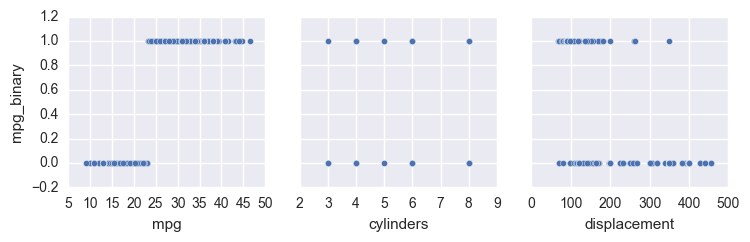

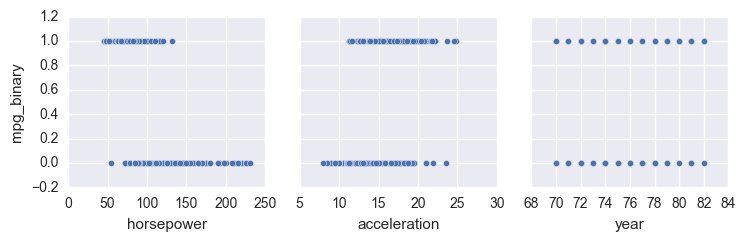

In [180]:
sns.pairplot(cars_mileage,x_vars=['mpg','cylinders','displacement'],
             y_vars=['mpg_binary'])
sns.pairplot(cars_mileage,x_vars=['horsepower','acceleration','year'],
             y_vars=['mpg_binary'])

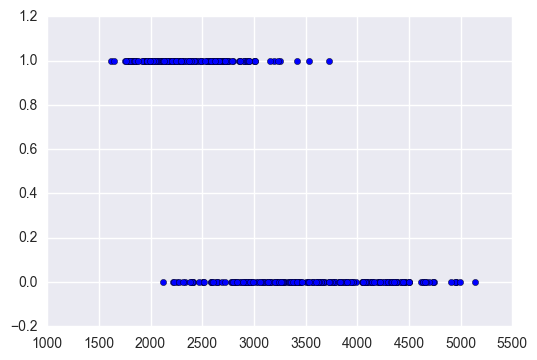

In [181]:
plt.scatter(cars_mileage['weight'],cars_mileage['mpg_binary'])

 #### Conlusion:
 From the plot, we see that high displacement or high horsepower or high weight may lead to the car's mpg below it's median.
 
 I think 'horsepower' is the most likely variable to be useful in predicting whether a car's mpg is above or below its median, since you can see from the plot, nearly after 125 horsepower, a car's mpg are all below its median.

## (c) Split the data into a training set and a test set.

In [182]:
# drop rows where 'horsepower' column contain missing values.
cars_mileage=cars_mileage[np.isfinite(cars_mileage['horsepower'])]

In [183]:
cars_mileage.count()

mpg             392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
year            392
origin          392
name            392
mpg_binary      392
dtype: int64

In [184]:
from patsy import dmatrices

In [185]:
# create dataframes with an intercept column
y,X=dmatrices('mpg_binary~mpg+cylinders+displacement+horsepower+weight+acceleration+year+origin',cars_mileage,
             return_type="dataframe")

In [186]:
# flatten y into a 1-D array
y = np.ravel(y)

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [188]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [189]:
print(len(X_train),len(X_test))

(274, 118)


## (d) Perform two of the following in order to predict mpg_binary:

In [190]:
cars_mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_binary
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0.0


>###  First: Logistic Regression

In [191]:
# Logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

In [192]:
# check the accuracy on the traning set
model.score(X,y)

0.97193877551020413

In [193]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-0.177869661086]
1,mpg,[1.59215283673]
2,cylinders,[-0.0695288860487]
3,displacement,[0.00207268601562]
4,horsepower,[-0.0710087610575]
5,weight,[0.000131012899913]
6,acceleration,[-0.589914312803]
7,year,[-0.270053035263]
8,origin,[-0.15708805699]


##### Increas in cylinders, displacement, and weight correspond to increase the liklihood of above the median of mileage. Instead, increase in cylinders, horsepower, acceleration, year and origin correspond to decrease the liklihood of above the median of mileage.

#### Model Evaluation

In [194]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [195]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print predicted

[ 1.  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.
  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  1.  0.  1.  0.  1.
  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.
  1.  1.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.
  0.  0.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.
  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.
  1.  0.  0.  1.  1.  0.  1.  1.  1.  0.]


In [196]:
# Meas squared error
mean_squared_error(y_test,predicted)

0.042372881355932202

In [197]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print probs[0:10]

[[  7.71130440e-05   9.99922887e-01]
 [  8.67113526e-01   1.32886474e-01]
 [  9.99999959e-01   4.14975437e-08]
 [  1.48612456e-10   1.00000000e+00]
 [  4.00309228e-07   9.99999600e-01]
 [  9.98668748e-01   1.33125205e-03]
 [  8.57522053e-10   9.99999999e-01]
 [  3.82586986e-04   9.99617413e-01]
 [  9.90225131e-01   9.77486857e-03]
 [  9.94881033e-01   5.11896707e-03]]


#### As you can see, the classifier is predicting a 1 (above the median) any time the probability in the second column is greater than 0.5.

In [198]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)

0.957627118644


##### The accuracy is 95.76%

In [199]:
# classification report
print metrics.classification_report(y_test, predicted)

             precision    recall  f1-score   support

        0.0       0.96      0.95      0.96        57
        1.0       0.95      0.97      0.96        61

avg / total       0.96      0.96      0.96       118



#### Precision of mpg_binary when it equals 1 is 95%.

In [200]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.975       0.925       0.975       0.975       0.95        0.87179487
  0.92307692  0.97368421  0.94736842  0.97368421]
0.948960863698


#### By cross-validation method (10-fold), we see the mean of 10 folds' accuracy is 94.89%, which is nealy same what we got before.

>### Second: Ridge Regression

In [201]:
from sklearn.linear_model import Ridge

In [219]:
def ridge_regression(X, y, alpha, models_to_plot={}):
    #Fit the model
    model3 = Ridge(alpha=alpha,normalize=True,max_iter=1e5)
    model3.fit(X,y)
    y_pred = model3.predict(X)
    
    #For every alpha, make a plot
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(X,y_pred)
        plt.plot(X,y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result with rss,intercept, and coefficients
    rss = sum((y_pred-y)**2)
    ret = [rss]
    ret.extend([model3.intercept_])
    ret.extend(model3.coef_[1:10])
    return ret

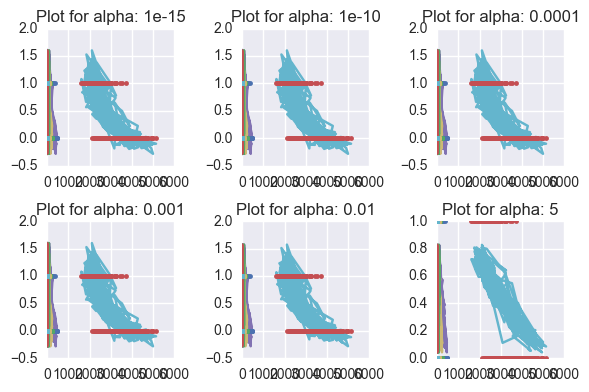

In [220]:
#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,9)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(X, y, alpha_ridge[i], models_to_plot)

In [221]:
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8
alpha_1e-15,25.581,-0.273658,0.0473796,-0.077081,-0.000670331,0.0031706,1.33334e-06,-0.00435621,-0.000739794,-0.012272
alpha_1e-10,25.581,-0.273658,0.0473796,-0.077081,-0.000670331,0.0031706,1.33334e-06,-0.00435621,-0.000739794,-0.012272
alpha_1e-08,25.581,-0.273658,0.0473796,-0.077081,-0.000670331,0.0031706,1.33332e-06,-0.00435621,-0.000739793,-0.012272
alpha_0.0001,25.581,-0.27385,0.0473518,-0.0770627,-0.000669056,0.00316672,1.14618e-06,-0.00436343,-0.000720487,-0.0122052
alpha_0.001,25.5815,-0.275558,0.0471039,-0.0768917,-0.000657987,0.00313212,-5.02811e-07,-0.00442862,-0.000548929,-0.0116127
alpha_0.01,25.6174,-0.290393,0.0448471,-0.0747948,-0.000577833,0.00281638,-1.41634e-05,-0.00507973,0.000980392,-0.00636508
alpha_1,33.8841,-0.210381,0.0135795,-0.036234,-0.00050198,-0.000756809,-7.15403e-05,-0.001671,0.0119763,0.0462997
alpha_5,49.9876,0.121621,0.00598186,-0.0211317,-0.00033182,-0.000724162,-4.30191e-05,0.00350434,0.00652772,0.0308406
alpha_10,62.2394,0.248603,0.00377963,-0.0141672,-0.000226445,-0.000517356,-2.8817e-05,0.00303027,0.00422803,0.0208565
alpha_20,74.5833,0.342616,0.00220785,-0.00855675,-0.000138016,-0.000322737,-1.73857e-05,0.00206237,0.00249844,0.0126321


### Observations:
####  1. We can see, the RSS increase with alpha increases. Meanwhile, the complexity of model will reduce.
####  2 .High alpha will lead to underfitting. But when alpha=1e-15, the RSS is not small, we conclude that using ridge regression to fit the model is not a quite good idea.

>### Third: Lasso Regression

In [216]:
from sklearn.linear_model import Lasso
def lasso_regression(X, y, alpha, models_to_plot={}):
    #Fit the model
    model4 = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    model4.fit(X,y)
    y_pred = model4.predict(X)
    
    #For every alpha, make a plot
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(X,y_pred)
        plt.plot(X,y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result with rss,intercept, and coefficients
    rss = sum((y_pred-y)**2)
    ret = [rss]
    ret.extend([model4.intercept_])
    ret.extend(model4.coef_[1:10])
    return ret

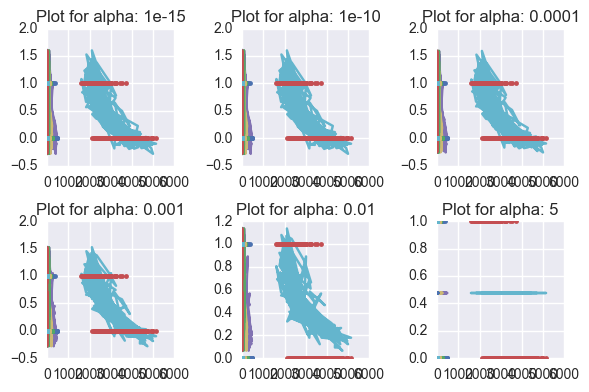

In [217]:
#Set the different values of alpha to be tested
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,9)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(X, y, alpha_lasso[i], models_to_plot)

In [218]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8
alpha_1e-15,25.581,-0.273658,0.0473796,-0.077081,-0.000670331,0.0031706,1.33334e-06,-0.00435621,-0.000739794,-0.012272
alpha_1e-10,25.581,-0.273658,0.0473796,-0.077081,-0.00067033,0.0031706,1.33328e-06,-0.00435621,-0.000739791,-0.012272
alpha_1e-08,25.581,-0.27367,0.0473792,-0.0770815,-0.00067027,0.00317057,1.32731e-06,-0.00435595,-0.00073944,-0.0122705
alpha_0.0001,25.6353,-0.264031,0.0460529,-0.0800018,-0.00037532,0.0024271,-0,-0.00524451,-0,-0
alpha_0.001,26.9408,-0.147814,0.0418174,-0.0580354,-0,0,-0,-0.00244686,0,0
alpha_0.01,44.0824,-0.190068,0.0284531,-0,-0,-0,-0,0,0,0
alpha_1,97.7934,0.477041,0,-0,-0,-0,-0,0,0,0
alpha_5,97.7934,0.477041,0,-0,-0,-0,-0,0,0,0
alpha_10,97.7934,0.477041,0,-0,-0,-0,-0,0,0,0
alpha_20,97.7934,0.477041,0,-0,-0,-0,-0,0,0,0


### Observations: 
#### 1. High alpha results in high rss.

#### 2. When alpha is big, for same alpha, lasso has higher rss than ridge, which means it has poor fit that ridge.

#### 3. Many of coefficients are zero.

In [223]:
# check how many 0 coffeicient does each row have
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    3
alpha_0.001     5
alpha_0.01      7
alpha_1         8
alpha_5         8
alpha_10        8
alpha_20        8
dtype: int64